In [164]:
import numpy as np
import pandas as pd
import json
import os

full = pd.read_csv("Full/full_3.csv", index_col=0)
full_err_df = pd.read_csv("Full/full_err.csv", index_col=0)
full_err_df['accumulated_error'] = np.abs(full_err_df['accumulated_error'])

/tmp/ipykernel_380940/2150376788.py:6: DtypeWarning: Columns (58,76,78,100,153) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv("Full/full_3.csv", index_col=0)


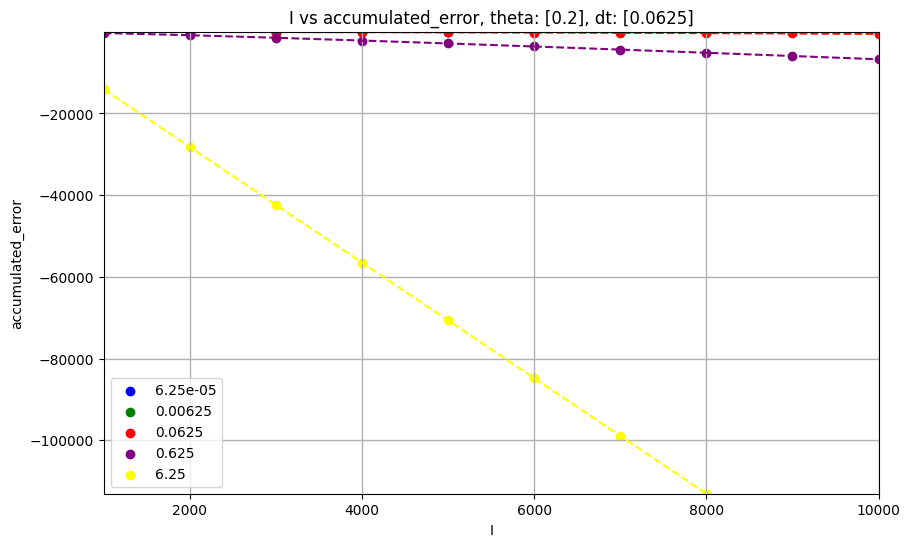

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

interval = 1000  # Define the interval for I
sampled_err_df = full_err_df[full_err_df['I'] % interval == 0]  # Sample rows where I is a multiple of the interval\
df = sampled_err_df

src = 'I'
target = 'accumulated_error'

# Define the filter criteria
filter_criteria = {
    'theta': [0.2],
    'N': [1000000],
    # 'dt': [0.00625,]
    # 'I': [10000],
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('dt')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
    ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale("asinh")         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis
# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
# Add labels, title, and legend
ax.set_xlabel(src)
ax.set_ylabel(target)
ax.set_title('I vs accumulated_error, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
ax.set_xlim(df[src].min() - 1, df['I'].max() + 1)
ax.set_ylim(df[target].min() * 0.8, df[target].max() * 1.2)


plt.show()


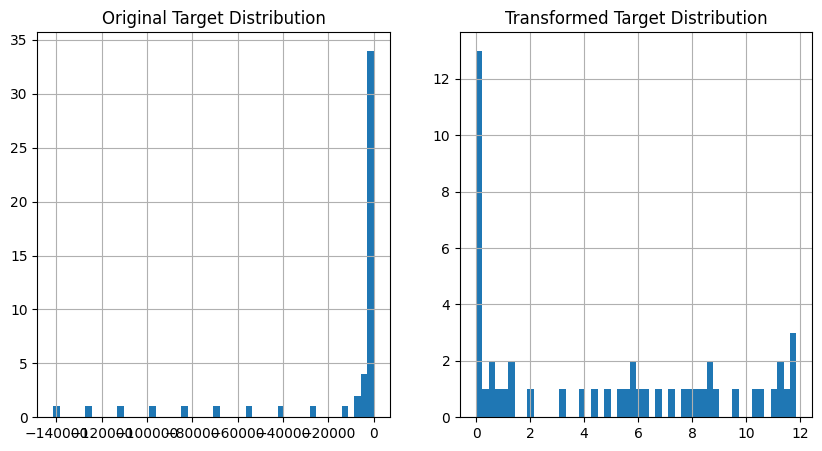

In [4]:
# Log transformation (ensure values are positive)
df['transformed_error'] = np.log(-df['accumulated_error'] + df['accumulated_error'].max() + 1)

# Plot original vs. transformed
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['accumulated_error'].hist(bins=50)
plt.title("Original Target Distribution")

plt.subplot(1, 2, 2)
df['transformed_error'].hist(bins=50)
plt.title("Transformed Target Distribution")
plt.show()


In [22]:
df['accumulated_error'].describe()

count     200.000000
mean     -393.613661
std       821.743518
min     -5537.900178
25%      -369.372935
50%       -41.582922
75%        -3.048499
max        -0.026467
Name: accumulated_error, dtype: float64

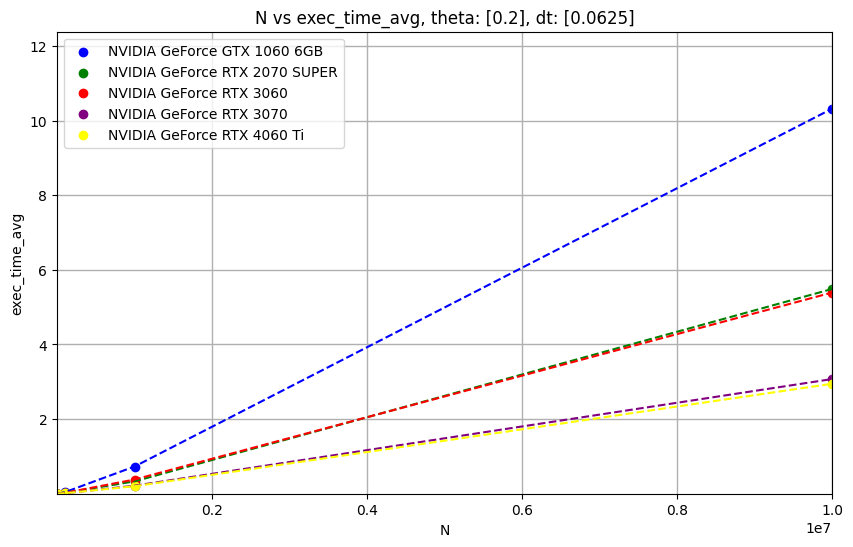

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

# Define the filter criteria
filter_criteria = {
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Group by a specific feature
grouped = df.groupby('Name')

# Plot X vs y for each group in the histogram
colors = ['blue', 'green', 'red', 'purple','yellow']  # Specify colors for each group if known

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X vs y with scatter points and connect them with dashed lines for each group
for (group_name, group_data), color in zip(grouped, colors):
    ax.scatter(group_data['N'], group_data['exec_time_avg'], color=color, label=f'{group_name}')
    ax.plot(group_data['N'], group_data['exec_time_avg'], linestyle='--', color=color)  # Dashed line

# Add grid and logarithmic scales
ax.grid(linestyle='-', linewidth=1)
# ax.set_yscale('log')         # Logarithmic scale for y-axis
# ax.set_xscale('symlog')      # Symmetric log scale for x-axis

# Add labels, title, and legend
ax.set_xlabel('N')
ax.set_ylabel('exec_time_avg')
ax.set_title('N vs exec_time_avg, theta: [0.2], dt: [0.0625]')
ax.legend()

# Set x and y limits to cover the range of points
ax.set_xlim(df['N'].min() - 1, df['N'].max() + 1)
ax.set_ylim(df['exec_time_avg'].min() * 0.8, df['exec_time_avg'].max() * 1.2)

plt.show()

# Plots for analysis

## N vs exec_time_avg

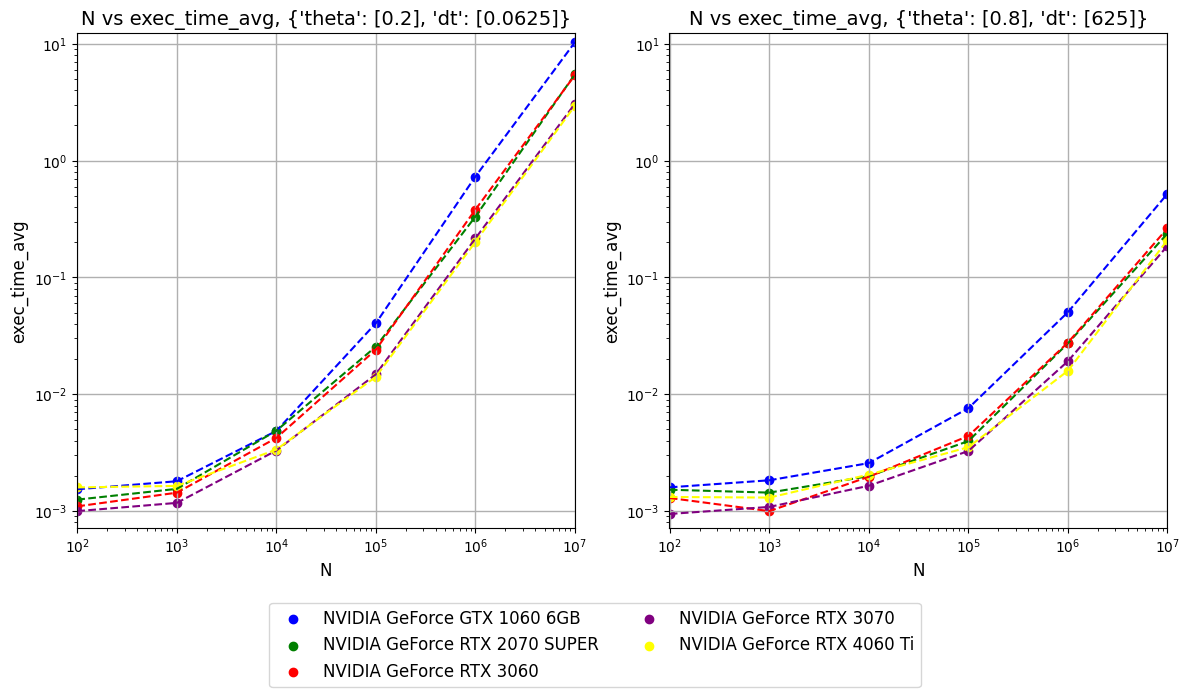

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

df = full
src = 'N'
target = 'exec_time_avg'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'theta': [0.2],
    'dt': [0.0625]
}

# Define the filter criteria for the second subplot
filter_criteria_2 = {
    'theta': [0.8],
    'dt': [625]
}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby('Name')
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    ax.set_yscale('log')         # Logarithmic scale for y-axis
    # 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
    ax.set_xscale('log')      # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    # Set x and y limits to cover the range of points
    ax.set_xlim(df[src].min() - 1, df[src].max() + 1)
    ax.set_ylim(df[target].min() * 0.8, df[target].max() * 1.2)
    if legend != False:
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=12)


    return grouped


# Plot the first subplot
grouped_1 = plot_filtered_data(axes[0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}',legend=True)

# Plot the second subplot
grouped_2 = plot_filtered_data(axes[1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}')

# Combine the group names from both subplots for the legend
group_names = list(grouped_2.groups.keys())

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


## theta vs exec_time_avg

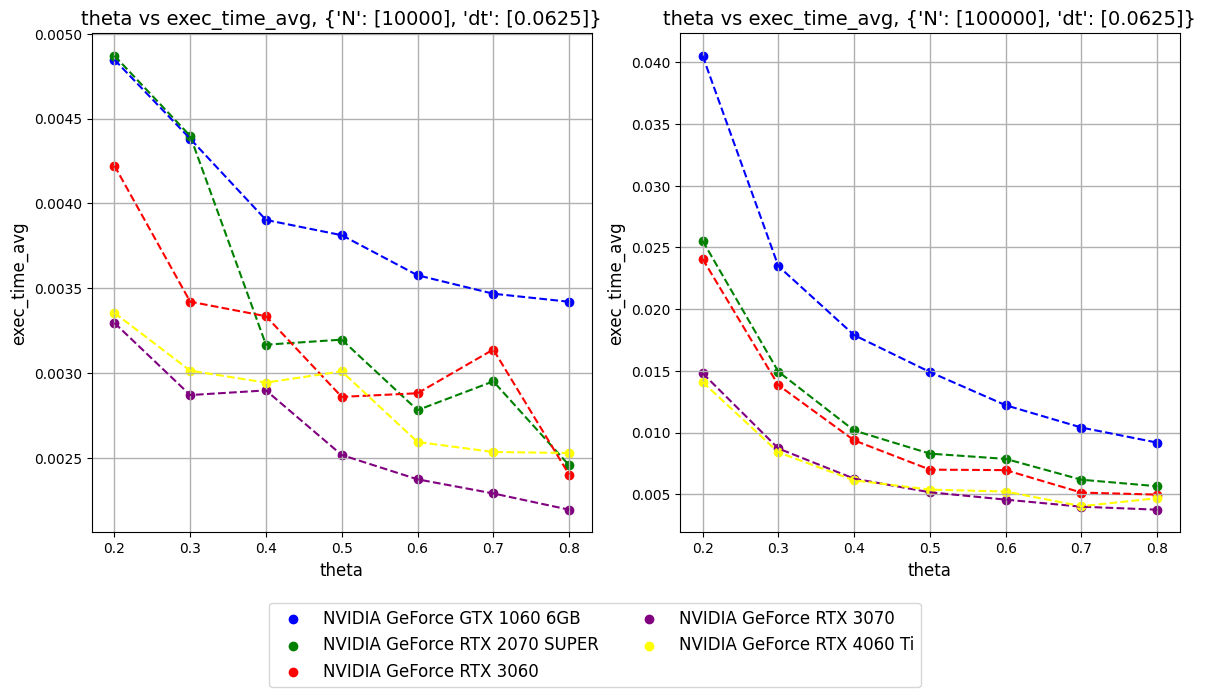

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

df = full
src = 'theta'
target = 'exec_time_avg'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'N': [10000],
    'dt': [0.0625]
}

# Define the filter criteria for the second subplot
filter_criteria_2 = {
    'N': [100000],
    'dt': [0.0625]
}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby('Name')
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    # ax.set_xscale('log')  # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    if legend != False:
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=12)


    return grouped


# Plot the first subplot
grouped_1 = plot_filtered_data(axes[0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}',legend=True)

# Plot the second subplot
grouped_2 = plot_filtered_data(axes[1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}')

# Combine the group names from both subplots for the legend
group_names = list(grouped_2.groups.keys())

# # Add the legend to the figure
# fig.legend(labels=group_names, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=12)



# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


## dt vs exec_time_avg

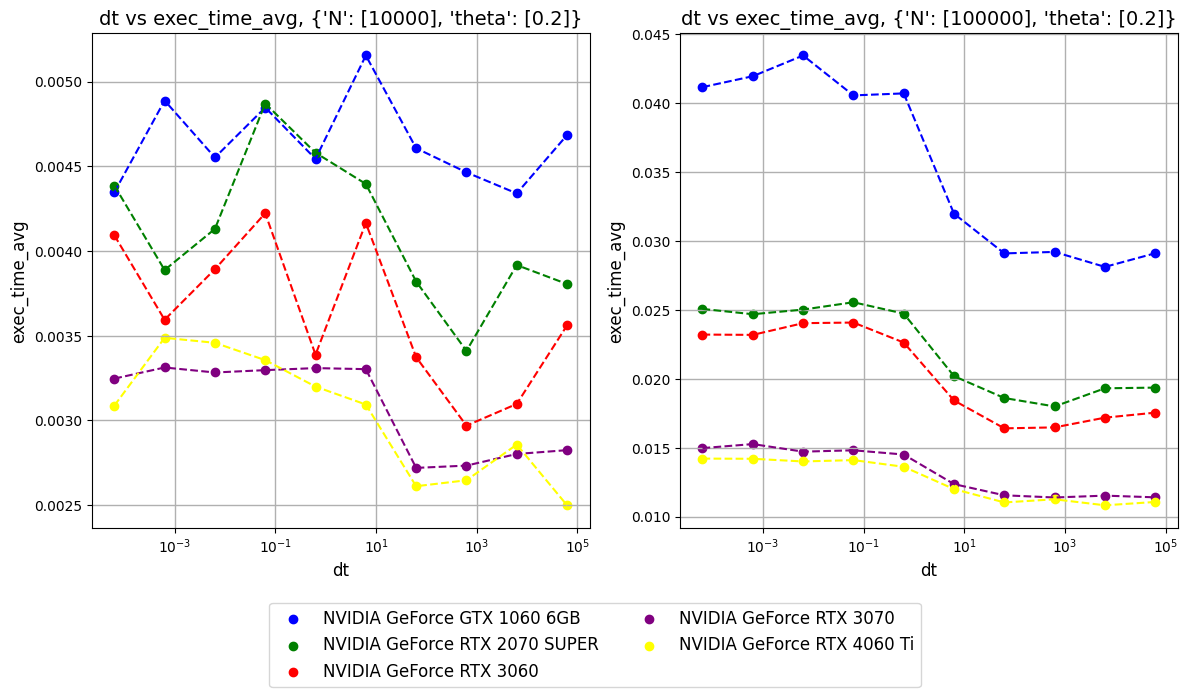

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

df = full
src = 'dt'
target = 'exec_time_avg'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'N': [10000],
    'theta': [0.2],
    # 'dt': [0.000625, 0.00625, 0.0625, 0.625, 6.25, 62.5, 625, 6250, 62500]
}

# Define the filter criteria for the second subplot
filter_criteria_2 = {
    'N': [100000],
    'theta': [0.2],
    # 'dt': [0.000625, 0.00625, 0.0625, 0.625, 6.25, 62.5, 625, 6250, 62500]
}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby('Name')
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    ax.set_xscale('log')  # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    if legend != False:
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=12)


    return grouped


# Plot the first subplot
grouped_1 = plot_filtered_data(axes[0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}',legend=True)

# Plot the second subplot
grouped_2 = plot_filtered_data(axes[1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}')

# Combine the group names from both subplots for the legend
group_names = list(grouped_2.groups.keys())

# # Add the legend to the figure
# fig.legend(labels=group_names, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=12)



# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


## GPU vs exec_time_avg

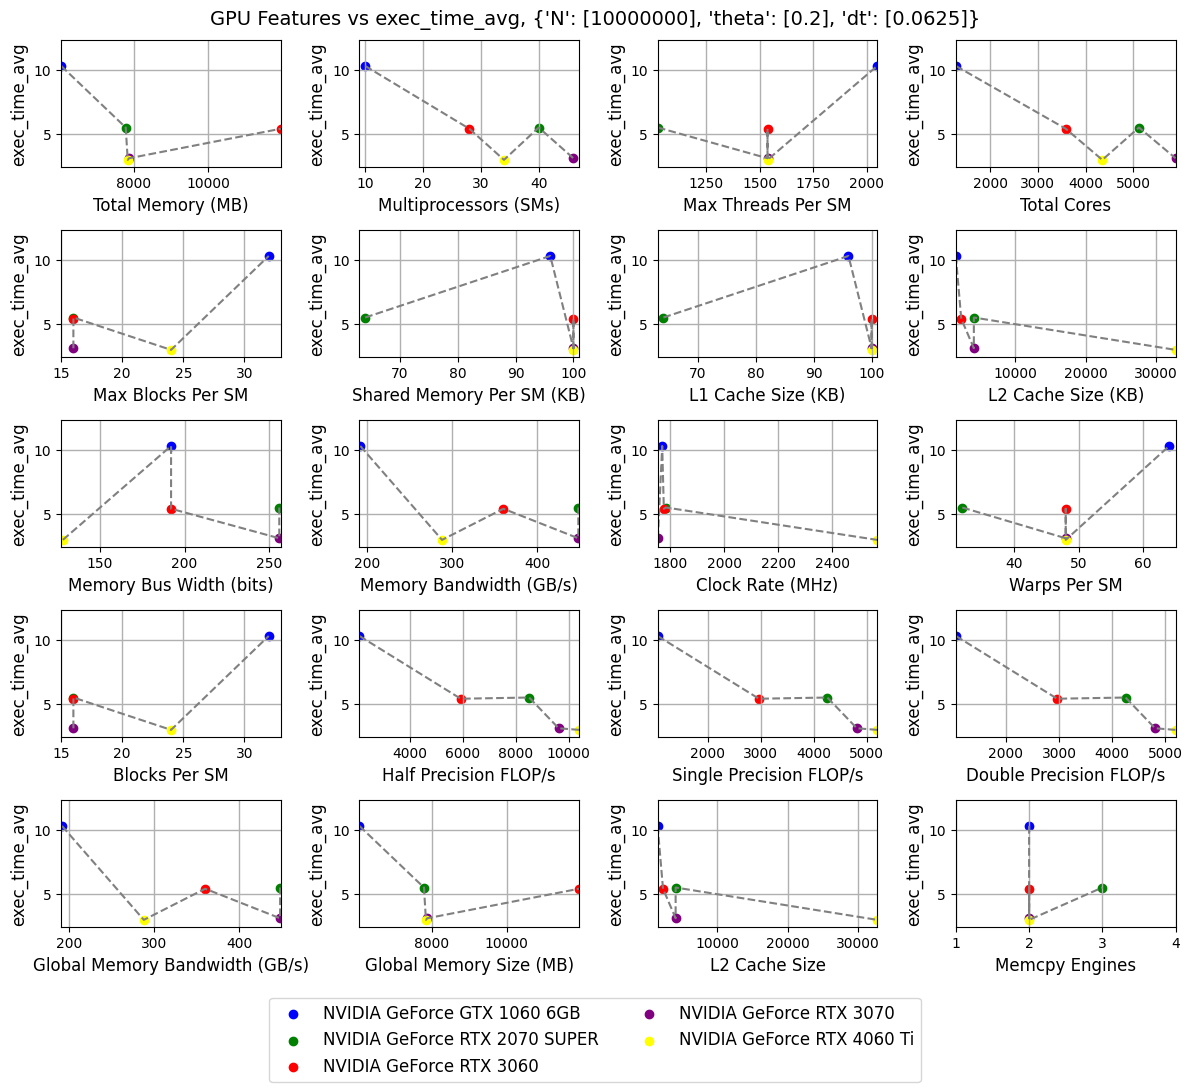

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

df = full

# Define the source features and target
# src_list = [
#     "Total Memory (MB)", "Multiprocessors (SMs)", "Max Threads Per SM", 
#     "Total Cores", "Warp Size", "Max Threads Per Block", "Max Blocks Per SM", 
#     "Shared Memory Per Block (KB)", "Shared Memory Per SM (KB)", 
#     "Registers Per Block", "Registers Per SM", "L1 Cache Size (KB)", 
#     "L2 Cache Size (KB)", "Memory Bus Width (bits)", "Memory Bandwidth (GB/s)", 
#     "Clock Rate (MHz)", "Warps Per SM", "Blocks Per SM", 
#     "Half Precision FLOP/s", "Single Precision FLOP/s", "Double Precision FLOP/s", 
#     "Concurrent Kernels", "Threads Per Warp", "Global Memory Bandwidth (GB/s)", 
#     "Global Memory Size (MB)", "L2 Cache Size", "Memcpy Engines"
# ]
src_list = [
    "Total Memory (MB)", "Multiprocessors (SMs)", "Max Threads Per SM", 
    "Total Cores", "Max Blocks Per SM", 
     "Shared Memory Per SM (KB)", 
     "L1 Cache Size (KB)", 
    "L2 Cache Size (KB)", "Memory Bus Width (bits)", "Memory Bandwidth (GB/s)", 
    "Clock Rate (MHz)", "Warps Per SM", "Blocks Per SM", 
    "Half Precision FLOP/s", "Single Precision FLOP/s", "Double Precision FLOP/s", 
    "Global Memory Bandwidth (GB/s)", 
    "Global Memory Size (MB)", "L2 Cache Size", "Memcpy Engines"
]
target = 'exec_time_avg'

# Define the filter criteria
filter_criteria = {
    'N': [10000000],
    'theta': [0.2],
    'dt': [0.0625]
}

# Apply filtering based on the filter criteria
for feature, values in filter_criteria.items():
    df = df[df[feature].isin(values)]

# Number of plots in the grid (based on number of source features)
n_cols = 4  # Adjusted to 4 columns to fit more plots in a row
n_rows = (len(src_list) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure and axes with tighter layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Place the legend outside the grid and only show it once

# Plot X vs y for each source feature
for i, src in enumerate(src_list):
    ax = axes[i]
    ax.grid(linestyle='-', linewidth=1)

    # Sort data by the source feature before plotting
    sorted_df = df.sort_values(by=src)

    # Group by 'Name' to have different colors for different groups
    grouped = sorted_df.groupby('Name')
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Adjust color list as needed
    for (group_name, group_data), color in zip(grouped, colors):
        ax.scatter(group_data[src], group_data[target], color=color)

    # Plot all the data with points connected by dashed lines
    ax.plot(sorted_df[src], sorted_df[target], linestyle='--', color='gray')  # Dashed line

    # Set the x and y axis limits to cover the range of points
    ax.set_xlim(sorted_df[src].min() - 1, sorted_df[src].max() + 1)
    ax.set_ylim(sorted_df[target].min() * 0.8, sorted_df[target].max() * 1.2)

    # Set the x and y labels
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)

fig.suptitle(f'GPU Features vs {target}, {filter_criteria}', fontsize=14)

fig.legend(labels=[group_name for group_name, _ in grouped], loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2, fontsize=12)

# Remove any empty subplots if the number of src features is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tight layout to make sure everything fits
plt.tight_layout()
plt.show()



## I vs accumulated_error

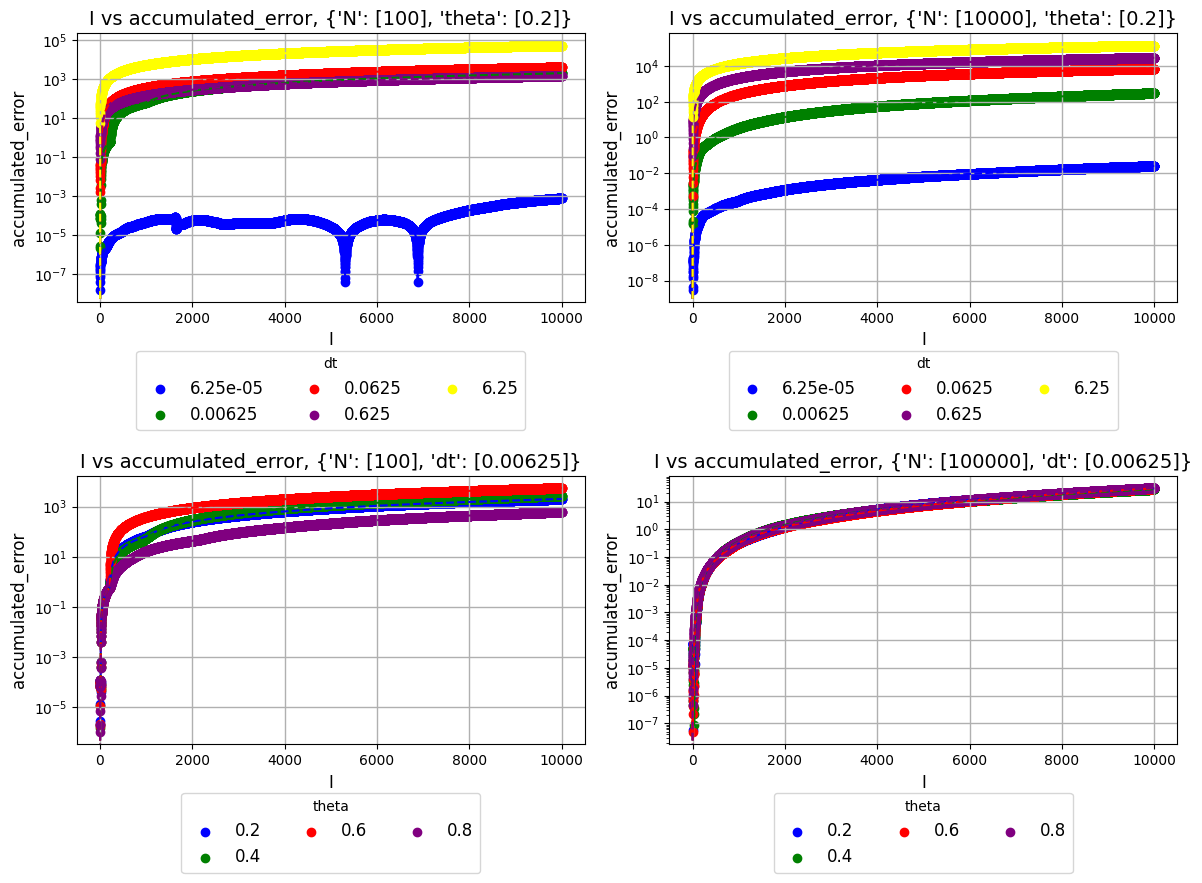

In [286]:
import pandas as pd
import matplotlib.pyplot as plt

df = full_err_df
src = 'I'
target = 'accumulated_error'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'N': [100],
    'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the first subplot
filter_criteria_2 = {
    'N': [10000],
    'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the second subplot
filter_criteria_3 = {
    'N': [100],
    # 'theta': [0.2],
    'dt': [0.00625]
}

# Define the filter criteria for the second subplot
filter_criteria_4 = {
    'N': [100000],
    # 'theta': [0.2],
    'dt': [0.00625]
}

# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False,grouper='dt',anchor=0.5):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby(grouper)
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    ax.set_yscale('log')  # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    if legend != False:
        ax.legend(title=grouper,loc='upper center', bbox_to_anchor=(anchor, -0.15), ncol=3, fontsize=12)

# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

    return grouped
    


grouped_1 = plot_filtered_data(axes[0][0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}', legend=True,grouper='dt', anchor=0.5)

grouped_2 = plot_filtered_data(axes[0][1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}', legend=True,grouper='dt', anchor=0.5)

grouped_1 = plot_filtered_data(axes[1][0], filter_criteria_3, f'{src} vs {target}, {filter_criteria_3}', legend=True,grouper='theta', anchor=0.5)

grouped_2 = plot_filtered_data(axes[1][1], filter_criteria_4, f'{src} vs {target}, {filter_criteria_4}', legend=True,grouper='theta', anchor=0.5)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

## N vs accumulated_error

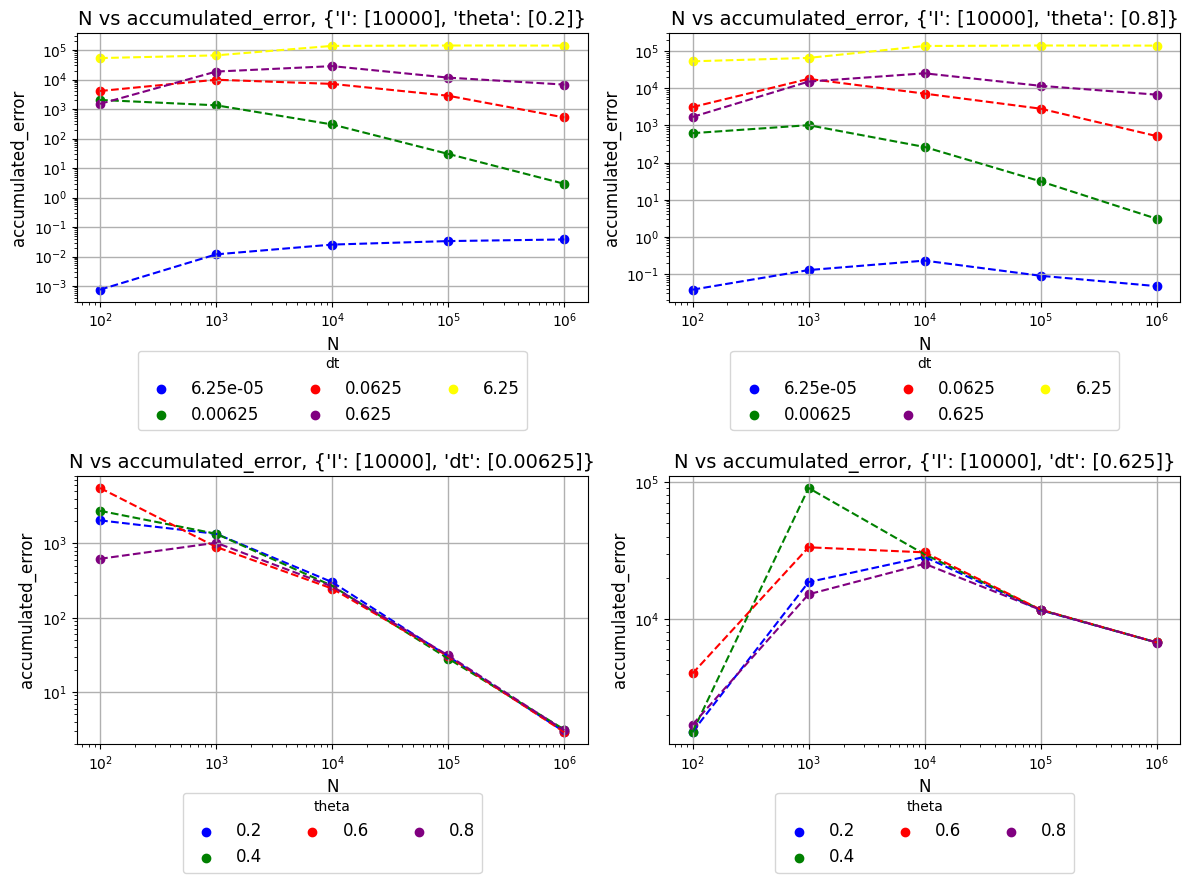

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

df = full_err_df
src = 'N'
target = 'accumulated_error'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'I': [10000],
    'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the first subplot
filter_criteria_2 = {
    'I': [10000],
    'theta': [0.8],
    # 'dt': [0.0625]
}

# Define the filter criteria for the second subplot
filter_criteria_3 = {
    'I': [10000],
    # 'theta': [0.2],
    'dt': [0.00625]
}

# Define the filter criteria for the second subplot
filter_criteria_4 = {
    'I': [10000],

    # 'theta': [0.2],
    'dt': [0.625]
}

# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False,grouper='dt',anchor=0.5):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby(grouper)
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    ax.set_yscale('log')  # Symmetric log scale for x-axis
    ax.set_xscale('log')  # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    if legend != False:
        ax.legend(title=grouper,loc='upper center', bbox_to_anchor=(anchor, -0.15), ncol=3, fontsize=12)

# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

    return grouped
    


grouped_1 = plot_filtered_data(axes[0][0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}', legend=True,grouper='dt', anchor=0.5)

grouped_2 = plot_filtered_data(axes[0][1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}', legend=True,grouper='dt', anchor=0.5)

grouped_1 = plot_filtered_data(axes[1][0], filter_criteria_3, f'{src} vs {target}, {filter_criteria_3}', legend=True,grouper='theta', anchor=0.5)

grouped_2 = plot_filtered_data(axes[1][1], filter_criteria_4, f'{src} vs {target}, {filter_criteria_4}', legend=True,grouper='theta', anchor=0.5)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

## theta vs accumulated_error

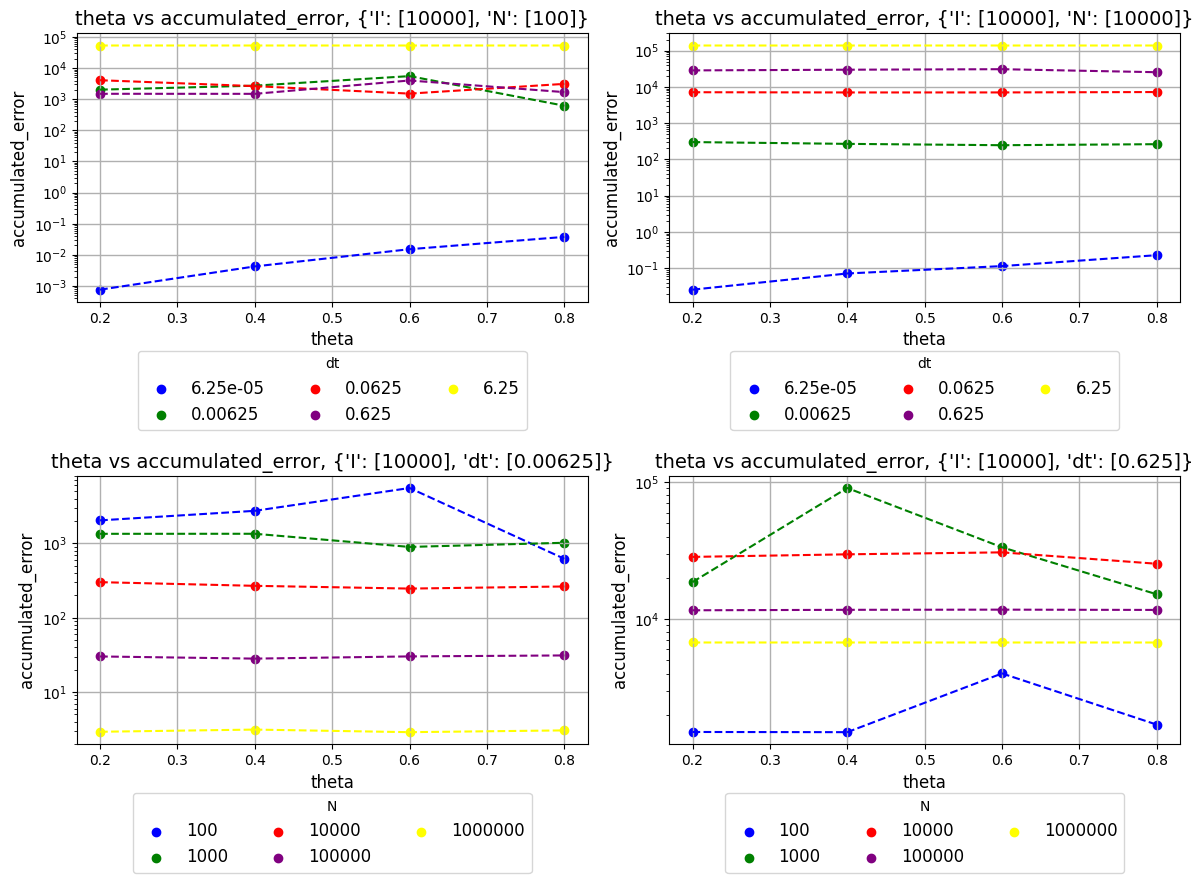

In [284]:
import pandas as pd
import matplotlib.pyplot as plt

df = full_err_df
src = 'theta'
target = 'accumulated_error'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'I': [10000],
    'N': [100],
    # 'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the first subplot
filter_criteria_2 = {
    'I': [10000],
    'N': [10000],
    # 'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the second subplot
filter_criteria_3 = {
    'I': [10000],
    # 'theta': [0.2],
    'dt': [0.00625]
}

# Define the filter criteria for the second subplot
filter_criteria_4 = {
    'I': [10000],

    # 'theta': [0.2],
    'dt': [0.625]
}

# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False,grouper='dt',anchor=0.5):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby(grouper)
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    ax.set_yscale('log')  # Symmetric log scale for x-axis
    # ax.set_xscale('log')  # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    if legend != False:
        ax.legend(title=grouper,loc='upper center', bbox_to_anchor=(anchor, -0.15), ncol=3, fontsize=12)

# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

    return grouped
    


grouped_1 = plot_filtered_data(axes[0][0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}', legend=True,grouper='dt', anchor=0.5)

grouped_2 = plot_filtered_data(axes[0][1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}', legend=True,grouper='dt', anchor=0.5)

grouped_3 = plot_filtered_data(axes[1][0], filter_criteria_3, f'{src} vs {target}, {filter_criteria_3}', legend=True,grouper='N', anchor=0.5)

grouped_4 = plot_filtered_data(axes[1][1], filter_criteria_4, f'{src} vs {target}, {filter_criteria_4}', legend=True,grouper='N', anchor=0.5)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

## dt vs accumulated_error

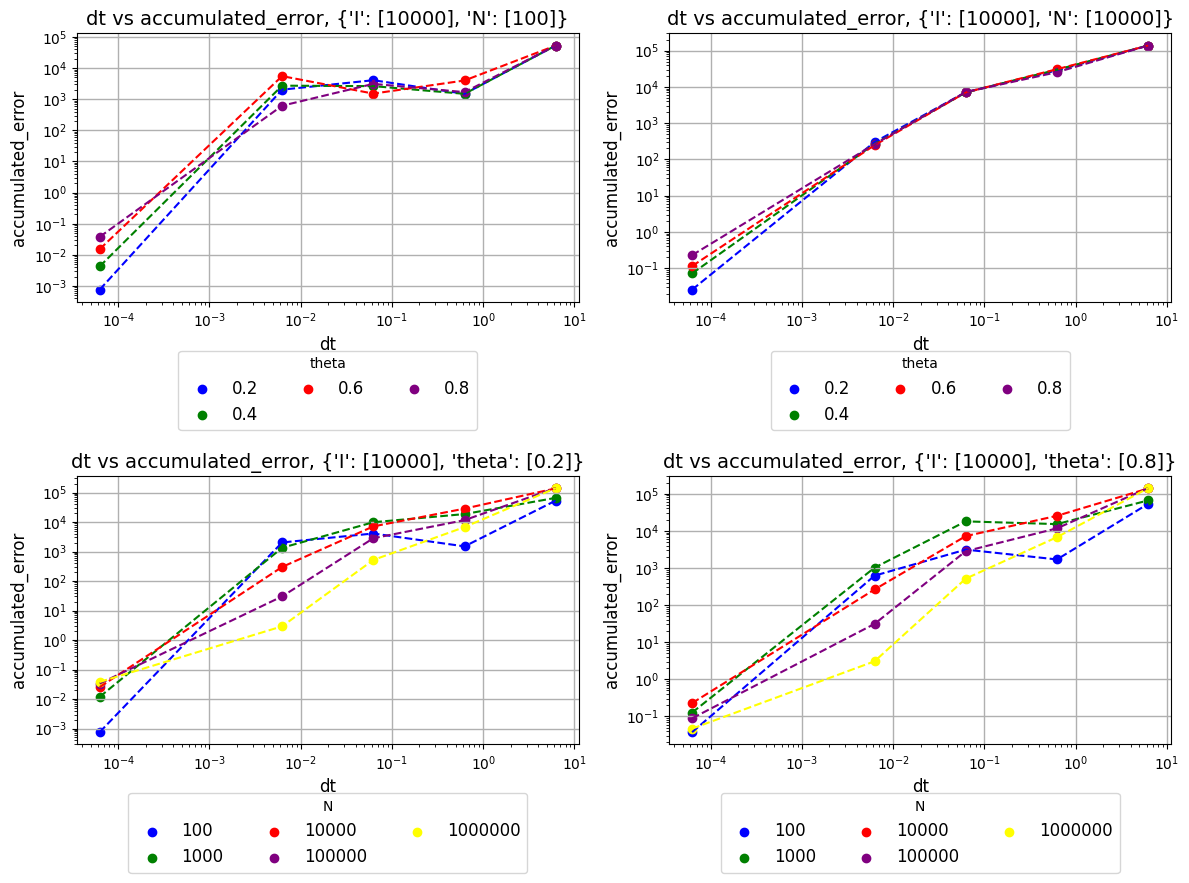

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

df = full_err_df
src = 'dt'
target = 'accumulated_error'

# Define the filter criteria for the first subplot
filter_criteria_1 = {
    'I': [10000],
    'N': [100],
    # 'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the first subplot
filter_criteria_2 = {
    'I': [10000],
    'N': [10000],
    # 'theta': [0.2],
    # 'dt': [0.0625]
}

# Define the filter criteria for the second subplot
filter_criteria_3 = {
    'I': [10000],
    'theta': [0.2],
    # 'dt': [0.00625]
}

# Define the filter criteria for the second subplot
filter_criteria_4 = {
    'I': [10000],

    'theta': [0.8],
    # 'dt': [0.625]
}

# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Function to apply filtering and plot
def plot_filtered_data(ax, filter_criteria, title,legend=False,grouper='dt',anchor=0.5):
    filtered_df = df.copy()
    for feature, values in filter_criteria.items():
        filtered_df = filtered_df[filtered_df[feature].isin(values)]
    
    grouped = filtered_df.groupby(grouper)
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Specify colors for each group if known

    for (group_name, group_data), color in zip(grouped, colors):
        scatter = ax.scatter(group_data[src], group_data[target], color=color, label=f'{group_name}')
        ax.plot(group_data[src], group_data[target], linestyle='--', color=color)  # Dashed line

    ax.grid(linestyle='-', linewidth=1)
    ax.set_yscale('log')  # Symmetric log scale for x-axis
    ax.set_xscale('log')  # Symmetric log scale for x-axis
    ax.set_xlabel(src, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.set_title(title, fontsize=14)
    if legend != False:
        ax.legend(title=grouper,loc='upper center', bbox_to_anchor=(anchor, -0.15), ncol=3, fontsize=12)

# 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

    return grouped
    


grouped_1 = plot_filtered_data(axes[0][0], filter_criteria_1, f'{src} vs {target}, {filter_criteria_1}', legend=True,grouper='theta', anchor=0.5)

grouped_2 = plot_filtered_data(axes[0][1], filter_criteria_2, f'{src} vs {target}, {filter_criteria_2}', legend=True,grouper='theta', anchor=0.5)

grouped_3 = plot_filtered_data(axes[1][0], filter_criteria_3, f'{src} vs {target}, {filter_criteria_3}', legend=True,grouper='N', anchor=0.5)

grouped_4 = plot_filtered_data(axes[1][1], filter_criteria_4, f'{src} vs {target}, {filter_criteria_4}', legend=True,grouper='N', anchor=0.5)

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()

## Model Results

### Execution

```bash
Final Data/Execution tabulated results.xlsx
```

### Precision

```bash
Final Data/Precision tabulated results.xlsx
```